<a href="https://colab.research.google.com/github/aryamanpathak2022/NCA-Nano-Credit-AI/blob/main/model/xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Missing values:
Community Reputation                            0
Business Activity Observations                  0
Informal Credit Relationships                   0
Asset Ownership                                 0
Utility and Bill Payment Patterns               0
Local Market Standing                           0
Participation in Welfare or Support Programs    0
Family and Dependents                           0
Seasonal and Environmental Impact               0
Behavioral Indicators                           0
Business Location and Infrastructure            0
Customer and Supplier Relationships             0
Observed Consistency                            0
Training and Skill Development                  0
Debt and Liabilities                            0
Savings and Insurance                           0
Aadhaar Card                                    0
Ration Card                                     0
Voter ID Card                                   0
Loan Approval                    

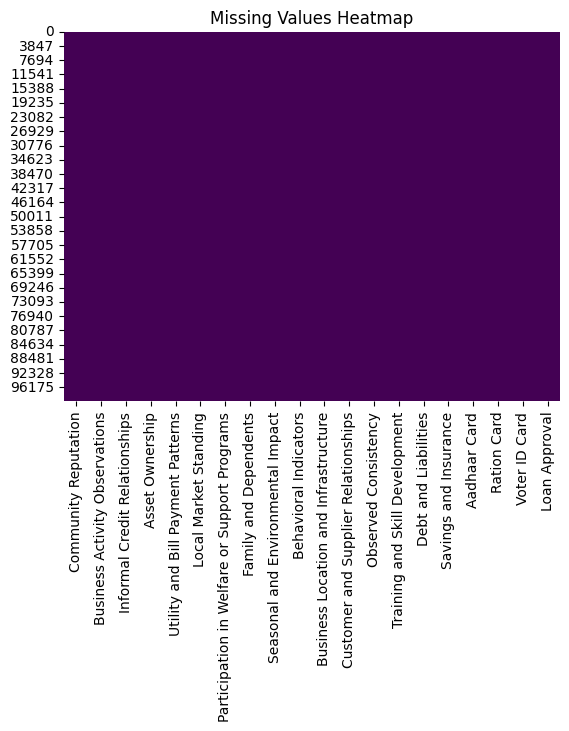

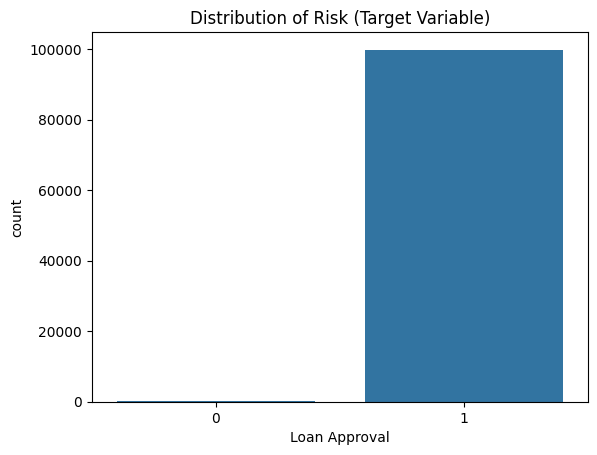

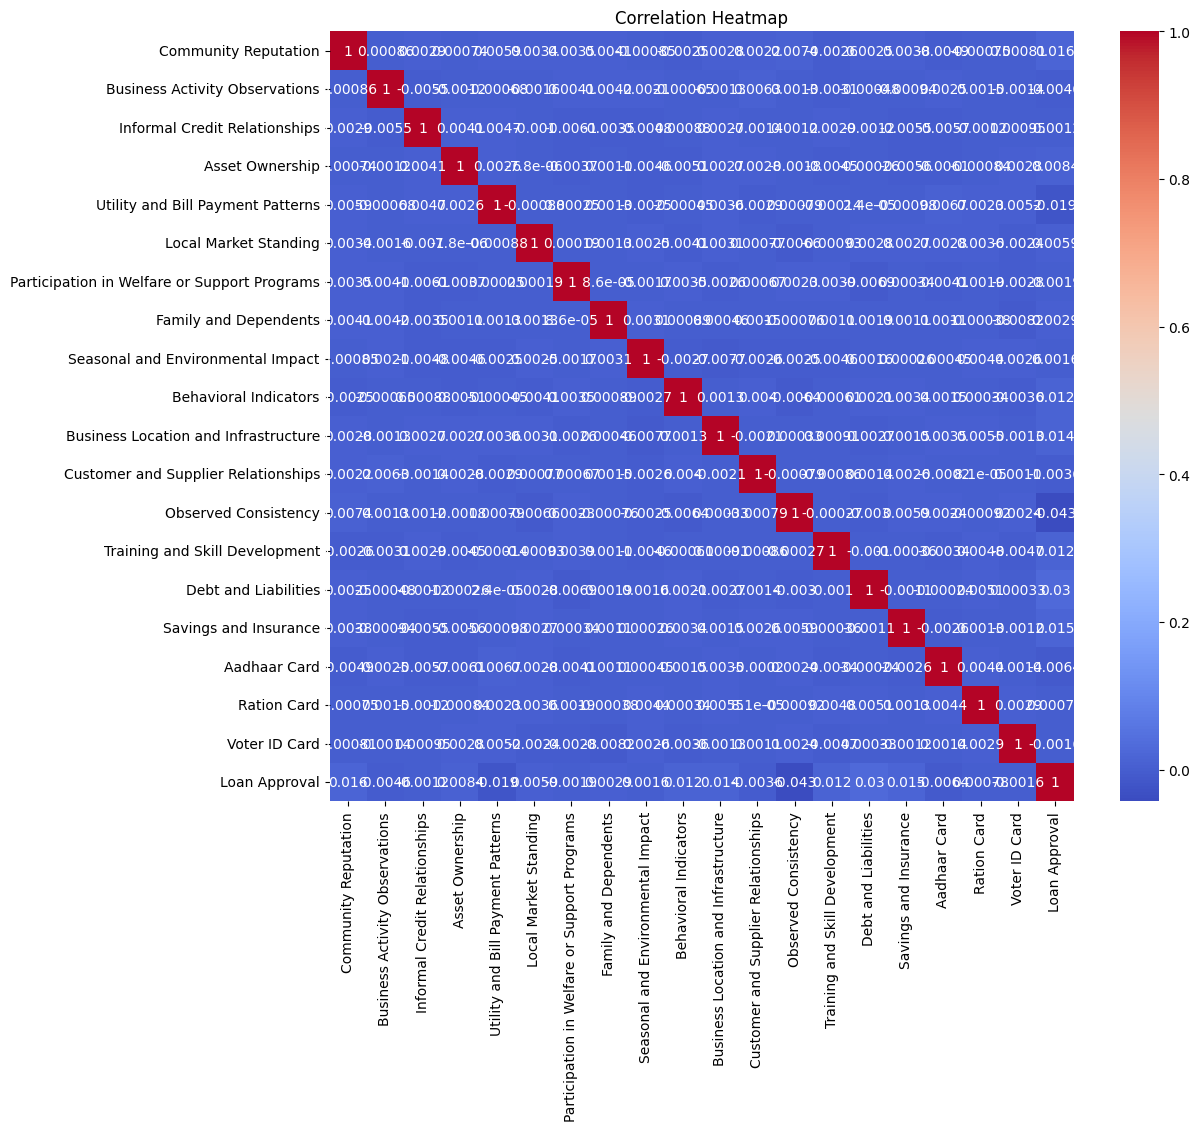

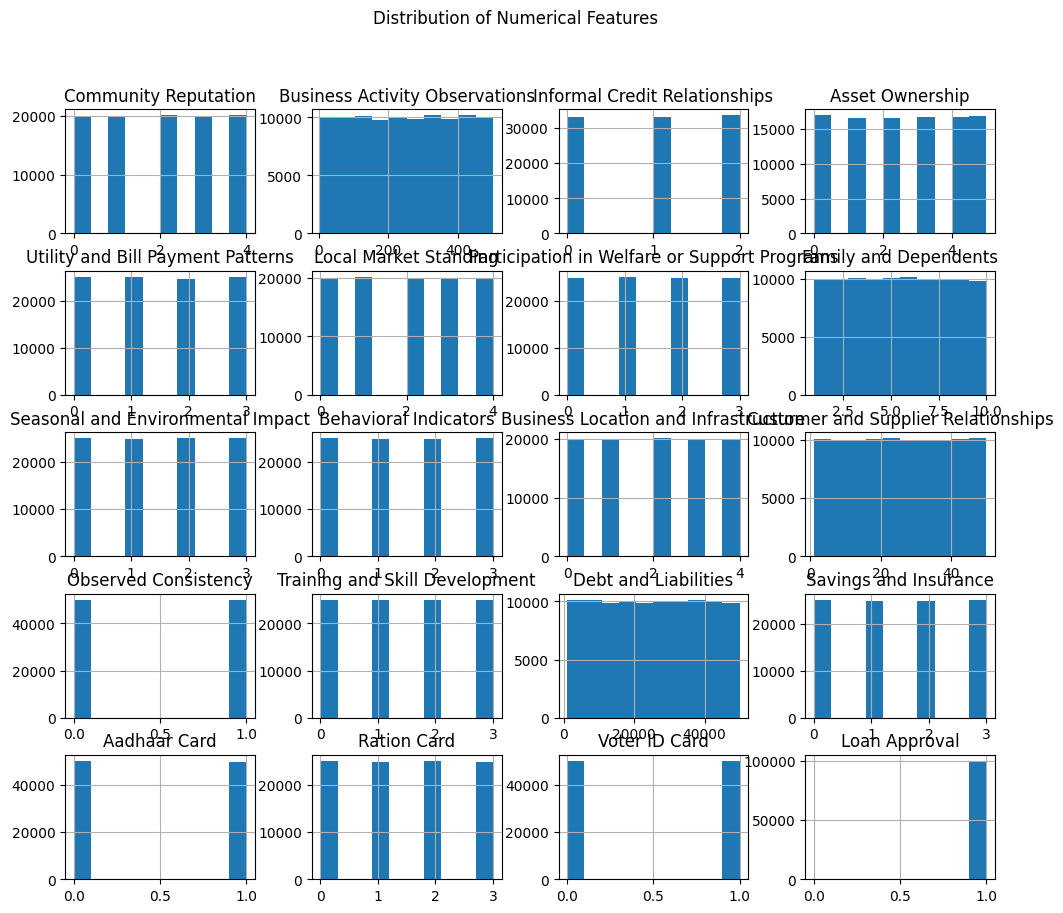

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:11:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 99.83%


<Figure size 1200x800 with 0 Axes>

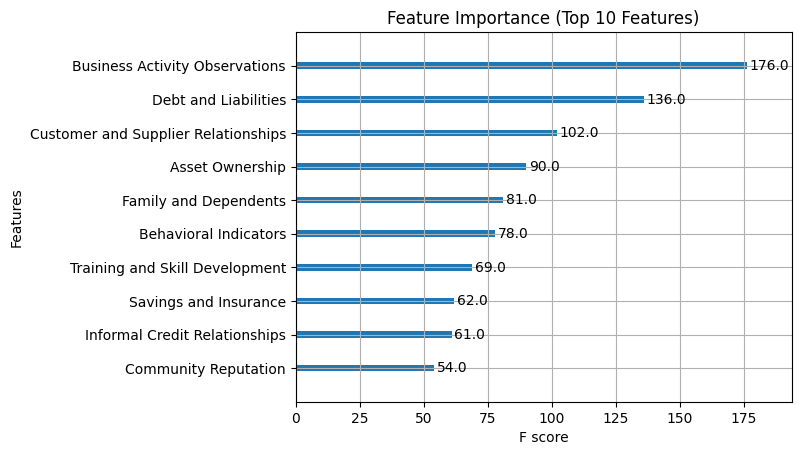

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Step 1: Load the data from a CSV file
df = pd.read_csv('drive/MyDrive/NCA/nca_data.csv')  # Replace 'data.csv' with the actual file path

# Step 2: Data Preprocessing

# 2.1: Identify categorical columns automatically based on dtype
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# 2.2: Label Encoding for categorical columns
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))  # Ensure the column is treated as string

# 2.3: Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Fill missing values or drop rows/columns based on the context
df = df.fillna(df.mean())  # For numerical columns
df = df.dropna()  # For categorical columns if needed

# Step 3: Exploratory Data Analysis (EDA)

# 3.1: Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# 3.2: Visualize missing values (heatmap)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# 3.3: Visualize the distribution of the target variable
sns.countplot(x='Loan Approval', data=df)
plt.title("Distribution of Risk (Target Variable)")
plt.show()

# 3.4: Correlation heatmap for numerical features
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 3.5: Distribution of numerical features (histograms)
df.hist(bins=10, figsize=(12, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Step 4: Split the data into features (X) and target (y)
X = df.drop(columns=['Loan Approval'])
y = df['Loan Approval']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Step 5: Train an XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Model Accuracy: {accuracy * 100:.2f}%")

# Step 8: Feature Importance Plot
plt.figure(figsize=(12, 8))
xgb.plot_importance(model, importance_type='weight', max_num_features=10)
plt.title("Feature Importance (Top 10 Features)")
plt.show()
